## Q-learning with Maze Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gymnasium import envs
import maze_worlds
from agent import MouseAgent
from tqdm import tqdm

## Environment Definition

In [2]:
env = envs.make('maze_worlds/MyWorld-v0', size=8, n_obstacles=14)

## Agent Definition

In [3]:
learning_rate = 0.1
n_episodes = 100
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = MouseAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

## Training

In [4]:
for episode in tqdm(range(n_episodes)):
    env.observation_space.seed(seed=4)
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 100/100 [00:00<00:00, 203.40it/s]


## Visualization

In [5]:
state_grid = np.zeros((8, 8))
for x1 in range(8):
    for x2 in range(8):
        state_grid[x2, x1] = np.max(agent.q_values[(x1, x2)])

policy_grid = np.zeros((8, 8))
for x1 in range(8):
    for x2 in range(8):
        policy_grid[x2, x1] = np.argmax(agent.q_values[(x1, x2)])

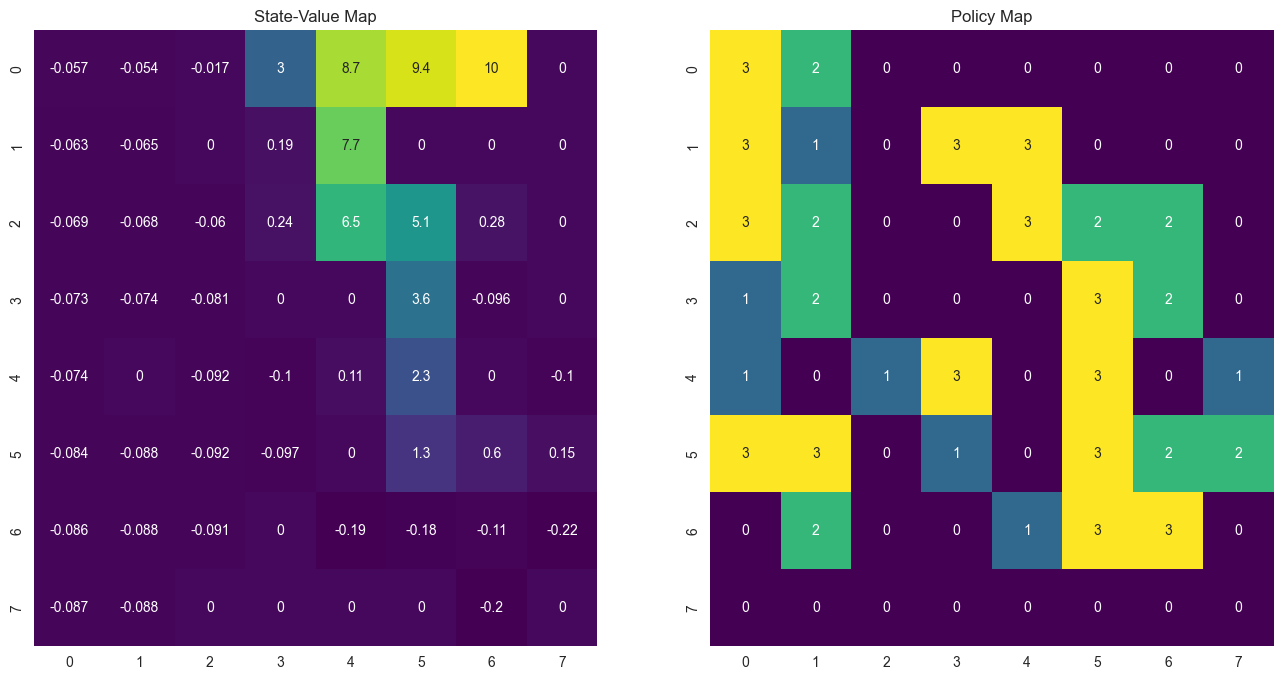

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].set_title('State-Value Map')
axes[1].set_title('Policy Map')

sns.heatmap(state_grid, linewidth=0, annot=True, cmap="viridis", cbar=False, ax=axes[0])
sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="viridis", cbar=False, ax=axes[1])

plt.show()

## Let's Render Every Episode This Time

In [7]:
env = envs.make('maze_worlds/MyWorld-v0', size=8, n_obstacles=14, render_mode='human')

In [8]:
learning_rate = 0.1
n_episodes = 100
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = MouseAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [9]:
for episode in tqdm(range(n_episodes)):
    env.observation_space.seed(seed=4)
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()
env.close()

100%|██████████| 100/100 [04:29<00:00,  2.69s/it]
